In [111]:
import time
import math
import pathlib
from pympler import asizeof

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader 
from torchvision import io, datasets, transforms

from PIL import Image

In [2]:
print(f"PyTorch v{torch.__version__}")
print(torch.__config__.show())

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device set to: {DEVICE}")

PyTorch v1.13.1+cu117
PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=sm_86
  - CuDNN 8.5
  - Magma 2.6.1
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=11.7, CUDNN_VERSION=8.5.0, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -fabi-version=11 -Wno-deprecated -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -fopenmp -DND

In [3]:
DATASET_PATH = pathlib.Path.home() / "dev" / "datasets" / "ares-minerals" / "pretraining-dataset" / "only-colors"
IMAGE_DATA_PATHS = list(DATASET_PATH.iterdir())

In [53]:
len(IMAGE_DATA_PATHS)

63

In [108]:
class MineralPretrainDataset():
    def __init__(self, dataset_path, transforms):
        self.image_paths = list(dataset_path.iterdir())
        self.preprocess = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        with Image.open(self.image_paths[idx]) as im:
            image = self.preprocess(im)
        return image

train_data = MineralPretrainDataset(DATASET_PATH,
                                transforms.Compose([
                                        transforms.ToTensor(),
                                        transforms.RandomCrop((1000, 1000)),
                                        transforms.Resize((224, 224))
                                    ]),
                                )

In [121]:
next(iter(train_loader)).shape

torch.Size([63, 3, 224, 224])

In [98]:
def to_MiB(size_in_bytes): return size_in_bytes / (1024 * 1024)
img_ndarray = plt.imread(path) 
print(f"Image Shape H,W,C: {img_ndarray.shape}")
image_memory_bytes = asizeof.asizeof(img_ndarray)
image_storage_bytes = pathlib.os.stat(path).st_size
print(f"Memory Allocated for Image : {to_MiB(image_memory_bytes):.3f} | Image Size on Disk: {to_MiB(image_storage_bytes):.3f} | Increase Factor: {(image_memory_bytes/image_storage_bytes):.3f}")

Image Shape H,W,C: (3000, 4096, 3)
Memory Allocated for Image : 35.156 | Image Size on Disk: 35.156 | Increase Factor: 1.000


torch.Size([3, 3000, 4096])


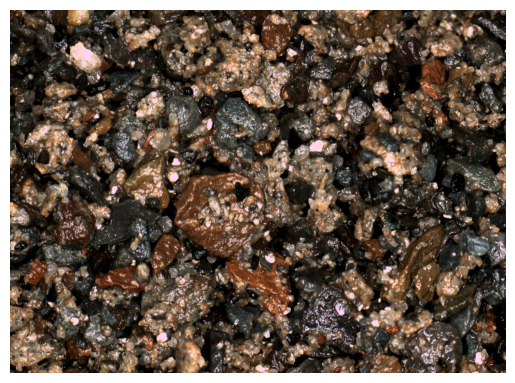

In [95]:
plt.axis('off')
print(img.shape)
plt.imshow(img.permute(1, 2, 0))

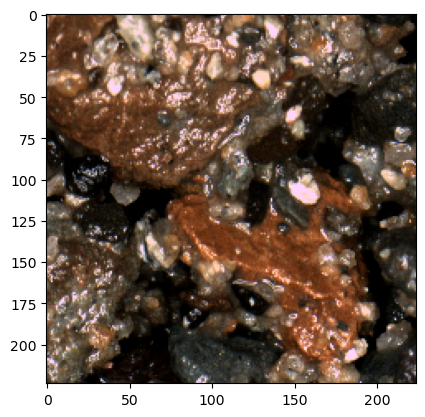

In [96]:
random_crop = transforms.RandomCrop((1000, 1000))
resize = transforms.Resize((224, 224))

plt.imshow(resize(random_crop(img)).permute(1, 2, 0))